In [1]:
import numpy as np
from galileojp.k3s import K3SGateway
from dotenv import load_dotenv
import warnings
from influxdb_client.client.warnings import MissingPivotFunction

warnings.simplefilter("ignore", MissingPivotFunction)

load_dotenv()

True

In [2]:
%env

{'PATH': '/home/silv/projects/silv-io/mulambda-experiments/.venv/bin:/home/silv/.pyenv/shims:/home/silv/.pyenv/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/lib/jvm/default/bin:/usr/bin/site_perl:/usr/bin/vendor_perl:/usr/bin/core_perl:/usr/lib/rustup/bin:/home/silv/.local/share/JetBrains/Toolbox/scripts',
 'INVOCATION_ID': '4c1fa86d4d394710bae59e96bc8b8608',
 'XAUTHORITY': '/run/user/1000/.mutter-Xwaylandauth.H3BZD2',
 'MEMORY_PRESSURE_WRITE': 'c29tZSAyMDAwMDAgMjAwMDAwMAA=',
 'GDMSESSION': 'gnome',
 'XDG_DATA_DIRS': '/home/silv/.local/share/flatpak/exports/share:/var/lib/flatpak/exports/share:/usr/local/share/:/usr/share/',
 'MEMORY_PRESSURE_WATCH': '/sys/fs/cgroup/user.slice/user-1000.slice/user@1000.service/session.slice/org.gnome.Shell@wayland.service/memory.pressure',
 'MOTD_SHOWN': 'pam',
 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus',
 'LANG': 'en_US.UTF-8',
 'XDG_SESSION_TYPE': 'wayland',
 'XDG_ACTIVATION_TOKEN': '<hidden>',
 'PS1': '(.venv) ',
 'XDG_CURRENT_DES

In [3]:
gw = K3SGateway.from_env()

In [5]:
exps = gw.experiments().sort_values(by='CREATED', ascending=False)
exps

/home/silv/projects/silv-io/mulambda-experiments/.venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/silv/projects/silv-io/mulambda-experiments/.venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,EXP_ID,NAME,CREATOR,START,END,CREATED,STATUS,metadata
174,202311071730-15bc,exp-log-size1-mulambda-client-psa-10-1-1,silvio,1.699375e+09,1.699375e+09,1.699375e+09,FINISHED,"{""exp_id"": ""202311071730-15bc"", ""target"": ""mul..."


In [6]:
# for exp_id in exps["EXP_ID"].values:
#     gw.delete(exp_id)
manual = "202310190836-8912"
exp_id = manual or exps["EXP_ID"].iloc[0]
exp_id

In [24]:
ev = gw.events(exp_id)
ev.head(10)

,value,exp_id,name,ts
ts,,,,
2023-10-19 06:37:01.033545494,"{""type"": ""start""}",202310190836-8912,mulambda,1697697421.0335455
2023-10-19 06:37:01.228759289,"{""type"": ""end""}",202310190836-8912,mulambda,1697697421.2287593
2023-10-19 06:37:02.440351486,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310190836-8912,mulambda,1697697422.4403515
2023-10-19 06:37:03.169773102,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310190836-8912,mulambda,1697697423.169773
2023-10-19 06:37:03.176978827,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310190836-8912,mulambda,1697697423.1769788
2023-10-19 06:37:03.872074842,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310190836-8912,mulambda,1697697423.8720748
2023-10-19 06:37:04.450951099,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310190836-8912,mulambda,1697697424.450951
2023-10-19 06:37:04.565711498,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310190836-8912,mulambda,1697697424.5657115
2023-10-19 06:37:05.133677005,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310190836-8912,mulambda,1697697425.133677


In [25]:
import json
from util import json_transform
import pandas as pd

new = ev.copy()
new['value'] = new['value'].apply(json.loads)
transformed = json_transform(new, "value")
transformed = json_transform(transformed, "model_traits", "model_")
transformed["time"] = (transformed.index - transformed.index[0]).total_seconds()
transformed

,exp_id,name,ts,type,client_id,data,endpoint,elapsed,targeted_node,model,...,model_id,model_type,model_input,model_output,model_mdd,model_latencies,model_accuracy,model_path,model_port,time
ts,,,,,,,,,,,,,,,,,,,,,
2023-10-19 06:37:01.033545494,202310190836-8912,mulambda,1697697421.0335455,start,None,None,None,NaN,NaN,None,...,None,None,None,None,NaN,None,NaN,None,NaN,0.000000
2023-10-19 06:37:01.228759289,202310190836-8912,mulambda,1697697421.2287593,end,None,None,None,NaN,NaN,None,...,None,None,None,None,NaN,None,NaN,None,NaN,0.195214
2023-10-19 06:37:02.440351486,202310190836-8912,mulambda,1697697422.4403515,request,mulambda-client,"{'inputs': [88.82, 60.06, 4.13, 69.41, 54.58, ...",http://logical-20231019083334-8-685e6f37.mulam...,1.097,0.0,None,...,logical-20231019083334-8-685e6f37,dummy,dummy,dummy,0.0,"{'mulambda-client': 90, 'round-robin-client': ...",0.297633,/,80.0,1.406806
2023-10-19 06:37:03.169773102,202310190836-8912,mulambda,1697697423.169773,request,mulambda-client,"{'inputs': [95.68, 64.3, 53.4, 13.01, 26.76, 9...",http://logical-20231019083334-8-685e6f37.mulam...,1.811,0.0,None,...,logical-20231019083334-8-685e6f37,dummy,dummy,dummy,0.0,"{'mulambda-client': 90, 'round-robin-client': ...",0.297633,/,80.0,2.136228
2023-10-19 06:37:03.176978827,202310190836-8912,mulambda,1697697423.1769788,request,mulambda-client,"{'inputs': [1.77, 85.25, 96.03, 4.37, 52.06, 2...",http://logical-20231019083334-5-e1ea8080.mulam...,0.571,0.0,None,...,logical-20231019083334-5-e1ea8080,dummy,dummy,dummy,0.0,"{'round-robin-client': 92, 'mulambda-client': ...",0.387961,/,80.0,2.143433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19 06:38:56.137058258,202310190836-8912,mulambda_companion,1697697536.1370583,companion,random-client,None,None,NaN,NaN,logical-20231019083334-5-e1ea8080,...,None,None,None,None,NaN,None,NaN,None,NaN,115.103513
2023-10-19 06:38:56.171359777,202310190836-8912,mulambda_companion,1697697536.1713598,companion,round-robin-client,None,None,NaN,NaN,logical-20231019083334-8-bd0a623e,...,None,None,None,None,NaN,None,NaN,None,NaN,115.137814
2023-10-19 06:38:56.236007929,202310190836-8912,mulambda_companion,1697697536.236008,companion,plain-net-latency-client,None,None,NaN,NaN,logical-20231019083334-8-685e6f37,...,None,None,None,None,NaN,None,NaN,None,NaN,115.202462


<AxesSubplot:xlabel='time', ylabel='elapsed'>

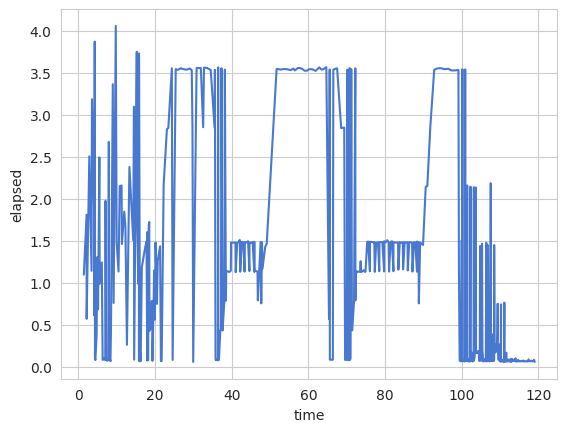

In [28]:
import seaborn as sns

sns.set_palette("muted")

sns.lineplot(data=transformed, x="time", y="elapsed")

NameError: name 'sns' is not defined

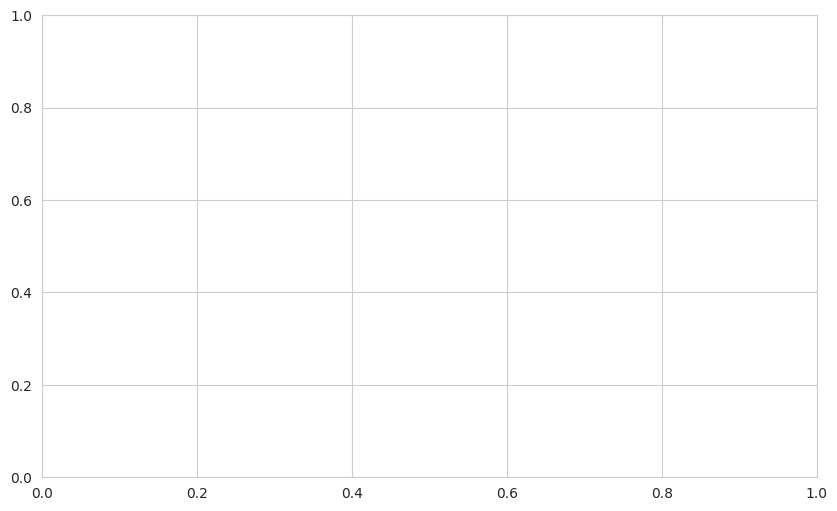

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=transformed, x="time", y="model_accuracy", ax=ax)
ax.set_ylim(0, 1)
plt.show()

<AxesSubplot:xlabel='elapsed', ylabel='Proportion'>

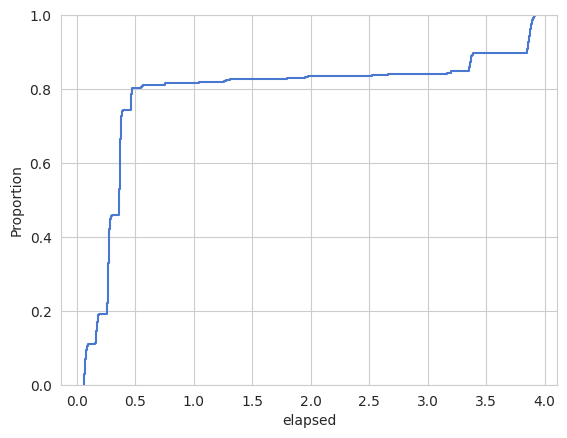

In [54]:
sns.ecdfplot(data=transformed, x="elapsed")

<AxesSubplot:xlabel='model_accuracy', ylabel='Proportion'>

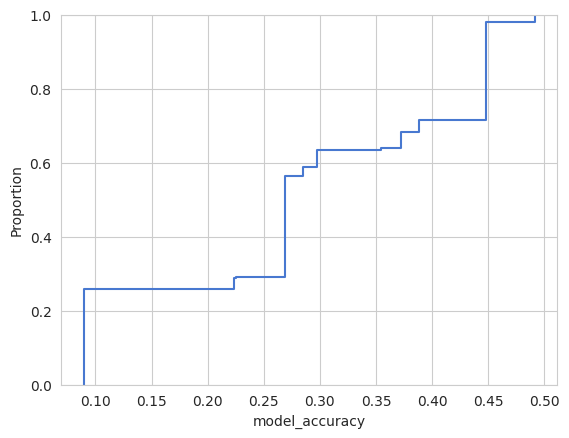

In [55]:
sns.ecdfplot(data=transformed, x="model_accuracy")


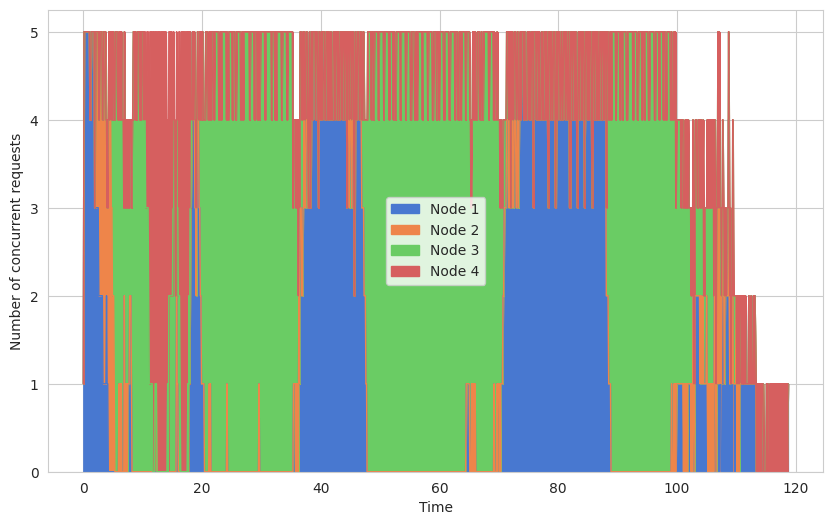

In [31]:

# transformed["targeted_node"] = transformed["targeted_node"].astype("int").astype("category")
requests = transformed[transformed["type"] == "request"].copy()
requests["targeted_node"] = requests["targeted_node"].astype("int")
requests["start_time"] = requests.index - pd.to_timedelta(requests["elapsed"], unit="s")

time_intervals = pd.date_range(
    start=min(requests["start_time"]),
    end=max(requests.index),
    freq="100L",
)

event_counts = []
nodes = requests["targeted_node"].unique()

for interval in time_intervals:
    counts_per_node = [0,0,0,0] 
    for node in nodes:
        count = ((requests['start_time'] <= interval) & (
                requests.index >= interval) & (
                         requests["targeted_node"] == node)).sum()
        counts_per_node[node] = count
    event_counts.append(counts_per_node)

counts_df = pd.DataFrame(event_counts)
counts_df.columns = ["Node 1", "Node 2", "Node 3", "Node 4"]
counts_df.index = counts_df.index / 10
# counts_df

ax = counts_df.plot.area(stacked=True, figsize=(10, 6), linewidth=1)
ax.set_xlabel('Time')
ax.set_ylabel('Number of concurrent requests')
# plt.legend(title='Event Type', labels=nodes)
plt.show()


In [32]:
import datetime

timestamp = 1697697422.4403515

# Split the timestamp into integer and fractional parts
seconds = int(timestamp)
microseconds = int((timestamp - seconds) * 1e6)

# Convert to a human-readable date and time
dt = datetime.datetime.utcfromtimestamp(seconds) + datetime.timedelta(
    microseconds=microseconds)

dt

datetime.datetime(2023, 10, 19, 6, 37, 2, 440351)